#### Import the libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Features description
<pre>
age
sex
chest pain  : type (4 values)
trestbps : resting blood pressure
chol : serum cholestoral in mg/dl
fbs : fasting blood sugar > 120 mg/dl
restecg : resting electrocardiographic results (values 0,1,2)
thalach : maximum heart rate achieved
exang : exercise induced angina
oldpeak:  ST depression induced by exercise relative to rest
slope : the slope of the peak exercise ST segment
cp : number of major vessels (0-3) colored by flourosopy
thal :  0 = normal; 1 = fixed defect; 2 = reversable defect
target : 1 => suffering from heart disease, 0 => Not suffering from heart disease
</pre>

#### Read the dataset 

In [8]:
df = pd.read_csv('Heart_Failure.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Shape

In [10]:
df.shape
# rows = 303, cols = 14

(303, 14)

In [ ]:
#### Attributes or Properties
# shape, values, columns, index

In [13]:
print(df.shape)
print(df.index)
print(df.columns)
print(df.values)

(303, 14)
RangeIndex(start=0, stop=303, step=1)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
[[63.  1.  3. ...  0.  1.  1.]
 [37.  1.  2. ...  0.  2.  1.]
 [41.  0.  1. ...  0.  2.  1.]
 ...
 [68.  1.  0. ...  2.  3.  0.]
 [57.  1.  0. ...  1.  3.  0.]
 [57.  0.  1. ...  1.  2.  0.]]


#### Data Preprocessing
<pre>
1) Handling Null
2) Handling Duplicates
3) Checking data types
4) Correlation
5) EDA
6) Outlier Treatment
6) Encoding categorical Features
7) Standardization
</pre>

#### 1) Handle the Null values

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### 2) Handing Duplicates

In [12]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [ ]:
#### Functions end with brackets - () - sum(), duplicated()
#### Attributes or properties are used directly - shape, columns, values, index
#### Accessor use square brackets -  [] - loc and iloc

#### 3) Check the datatypes

In [15]:
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Inference
No encoding is required

#### Correlation

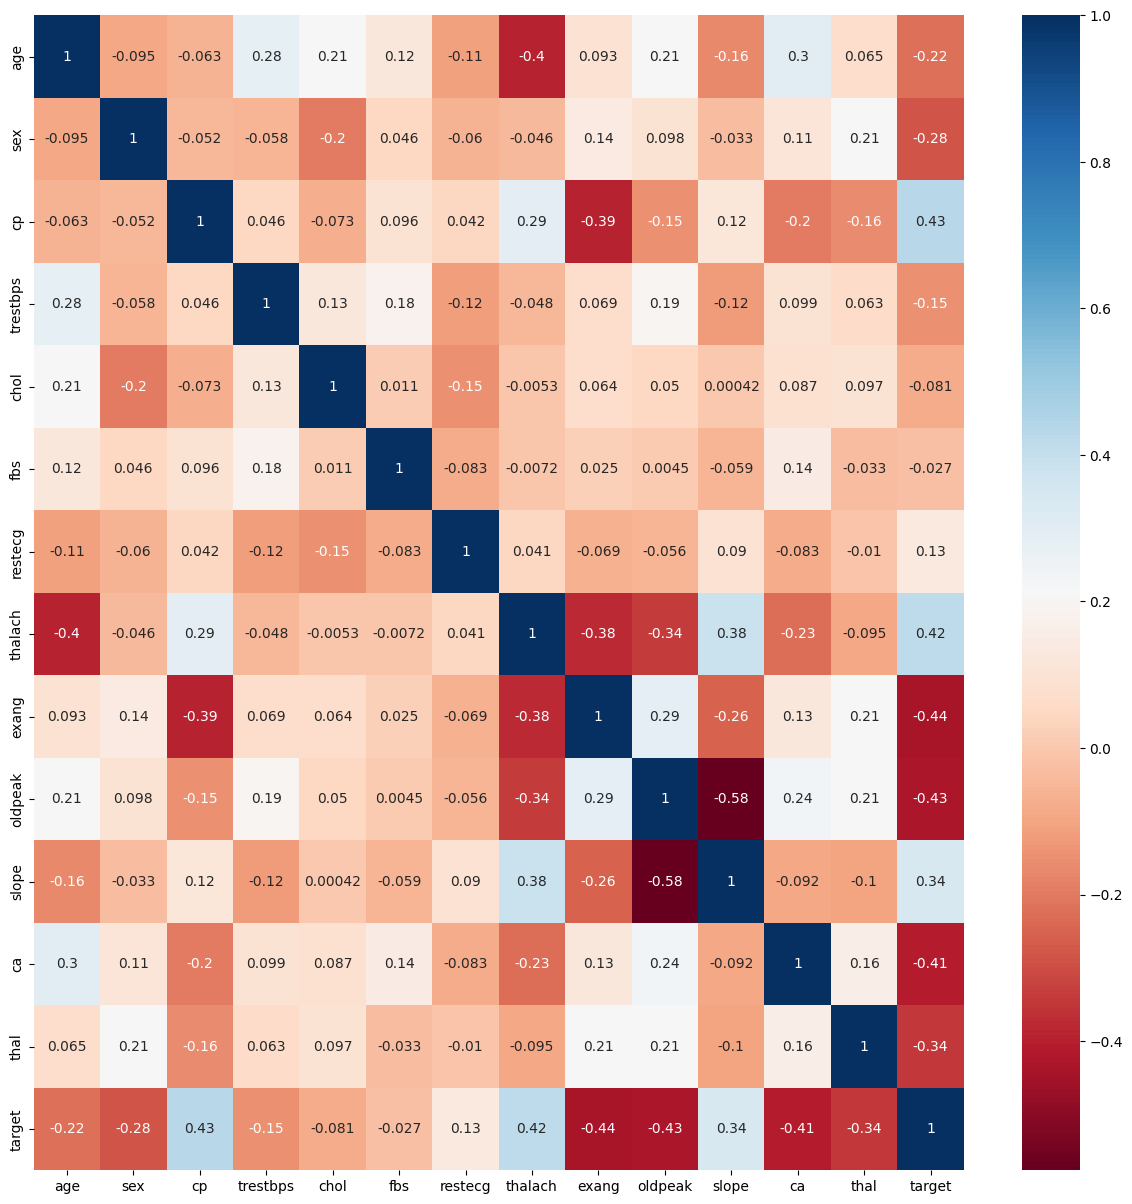

In [16]:
corr = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

### EDA

In [17]:
for i in df.columns:
    print(f'Feature {i} | Count of Unique Values {df[i].nunique()}')

Feature age | Count of Unique Values 41
Feature sex | Count of Unique Values 2
Feature cp | Count of Unique Values 4
Feature trestbps | Count of Unique Values 49
Feature chol | Count of Unique Values 152
Feature fbs | Count of Unique Values 2
Feature restecg | Count of Unique Values 3
Feature thalach | Count of Unique Values 91
Feature exang | Count of Unique Values 2
Feature oldpeak | Count of Unique Values 40
Feature slope | Count of Unique Values 3
Feature ca | Count of Unique Values 5
Feature thal | Count of Unique Values 4
Feature target | Count of Unique Values 2


In [18]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
for i in cat_cols:
    print(f'Feature {i} | Count of Unique Values {df[i].nunique()}')

Feature sex | Count of Unique Values 2
Feature cp | Count of Unique Values 4
Feature fbs | Count of Unique Values 2
Feature restecg | Count of Unique Values 3
Feature exang | Count of Unique Values 2
Feature slope | Count of Unique Values 3
Feature ca | Count of Unique Values 5
Feature thal | Count of Unique Values 4


In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
num_cols = ['age','trestbps','chol','thalach','oldpeak']
print('Continuous Features\n',num_cols)
print('Categorical Features\n',cat_cols)

Continuous Features
 ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical Features
 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


#### Impact of Heart Disease on cat Features

In [ ]:
# std_samp = N-1
# std_pop = N, ddof = 0/1

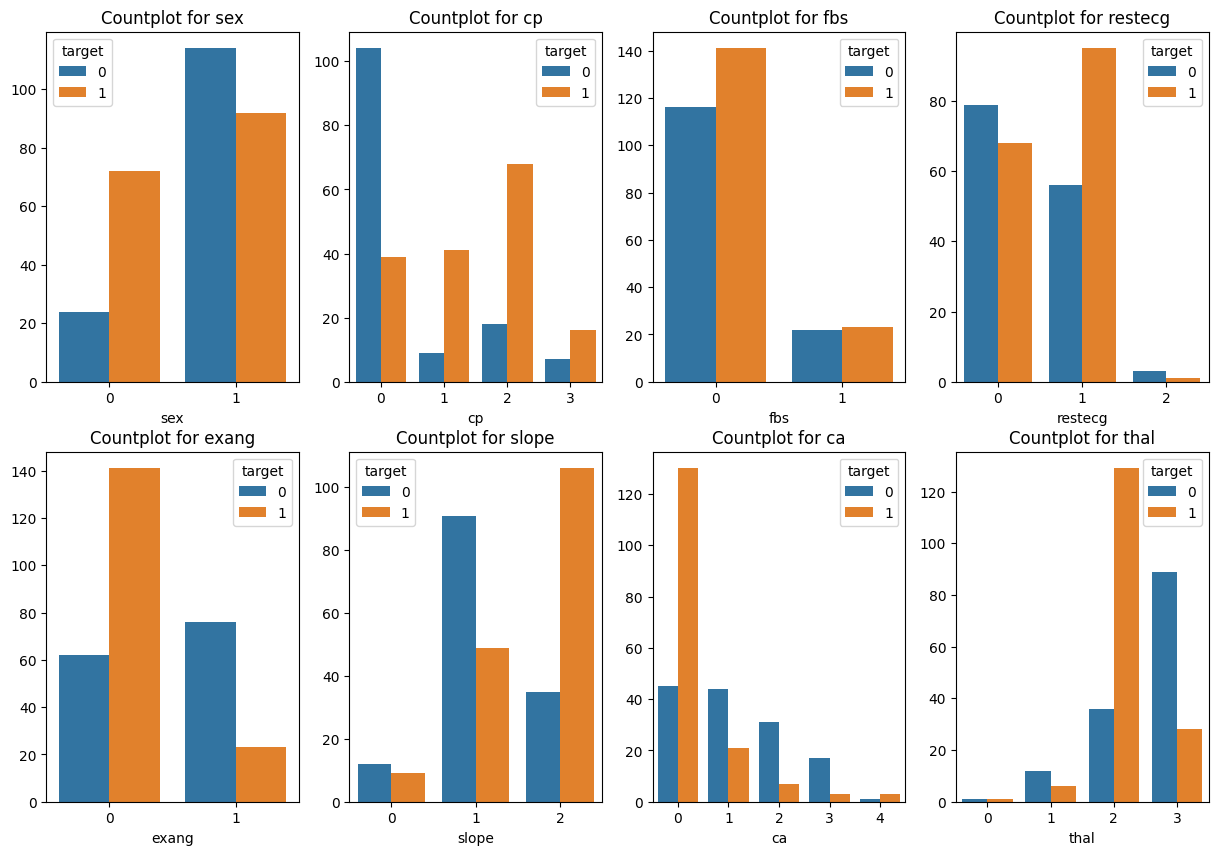

In [29]:
# print(cat_cols)
plt.figure(figsize=(15,10))
for i in range(len(cat_cols)):  # range(8) => 0,1,2,3,4,5,6,7
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[cat_cols[i]],hue=df['target'])
    plt.title(f'Countplot for {cat_cols[i]}')
    plt.ylabel('')
plt.show()

In [27]:
df['target'].value_counts()
# 1 - 164 (patients suffering from heart disease)
# 0 - 138 (patients not suffering from heart disease)

1    164
0    138
Name: target, dtype: int64

In [30]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

#### Impact of Numerical features on Heart Disease

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


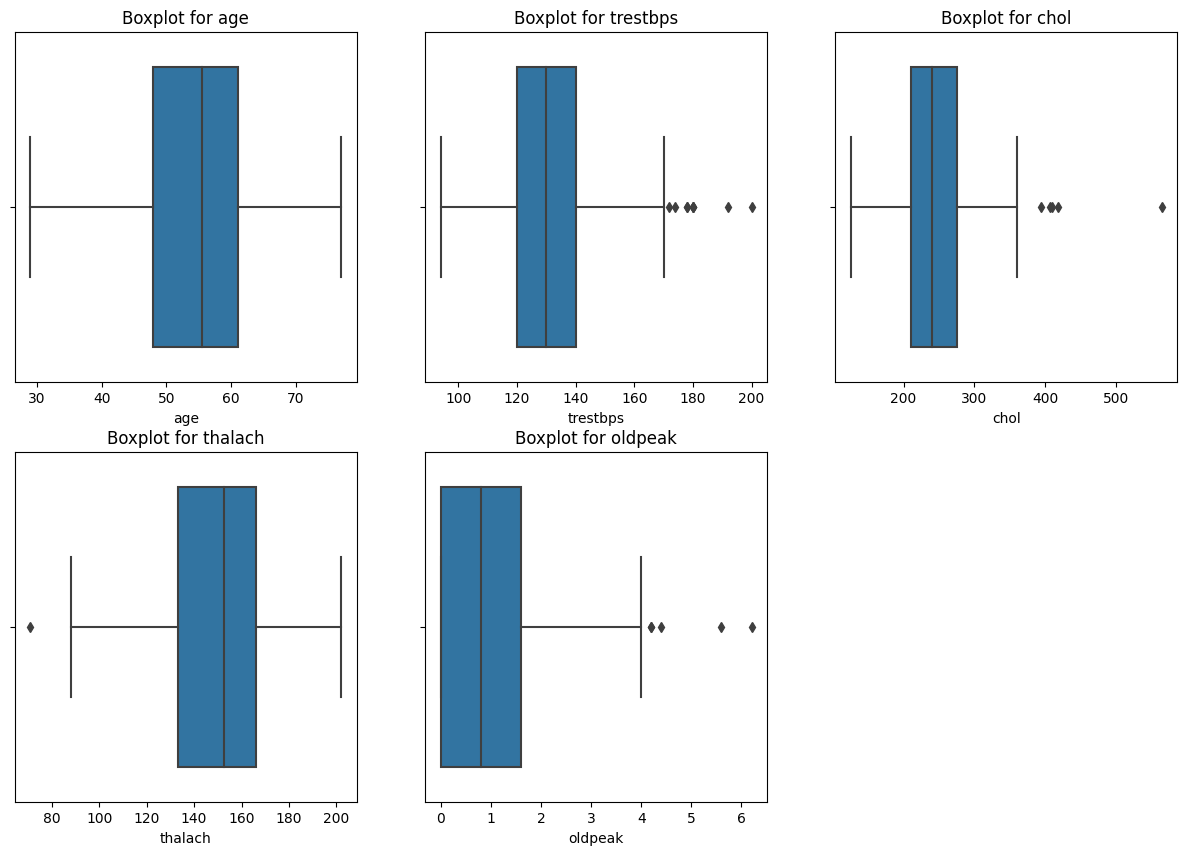

In [32]:
print(num_cols)
plt.figure(figsize=(15,10))
for i in range(len(num_cols)):  # range(5) => 0,1,2,3,4,5,6,7
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
    plt.ylabel('')
plt.show()

### Outlier Treatment

1) IQR method<br>
2) Capping or clipping

In [34]:
a = df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
age,29.0,35.00,35.04,38.00,40.00,55.5,68.00,69.97,70.00,71.00,77.0
trestbps,94.0,100.00,101.02,104.03,108.00,130.0,160.00,170.00,177.92,180.00,200.0
chol,126.0,149.00,160.08,167.03,175.05,240.5,326.95,340.97,353.98,406.87,564.0
thalach,71.0,95.01,97.04,103.06,108.05,152.5,181.95,184.97,186.98,191.98,202.0
oldpeak,0.0,0.00,0.00,0.00,0.00,0.8,3.40,3.60,4.00,4.20,6.2


In [43]:
df[df['trestbps']>df['trestbps'].quantile(0.97)].shape

(9, 14)

In [40]:
print(df[df['trestbps']>170].shape)  # >97%ile = 9 records
print(df[df['chol']>406.87].shape)  # >99%ile = 4 records
print(df[df['thalach']<95.01].shape) # <1%ile = 4 records
print(df[df['oldpeak']>4.20].shape) # >99%ile = 3 records

(9, 14)
(4, 14)
(4, 14)
(3, 14)


In [41]:
df.shape

(302, 14)

In [47]:
r = np.array([10,20,30,40,50,60,70,45,55])
r1 = np.where(r%3==0,'Hello',r)
print(r1)

['10' '20' 'Hello' '40' '50' 'Hello' '70' 'Hello' '55']


In [44]:
df['trestbps'] = np.where(df['trestbps']>170,170,df['trestbps'])
df['chol'] = np.where(df['chol']>406.87,406.87,df['chol'])
df['thalach'] = np.where(df['thalach']<95.01,95.01,df['thalach'])
df['oldpeak'] = np.where(df['oldpeak']>4.20,4.20,df['oldpeak'])

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


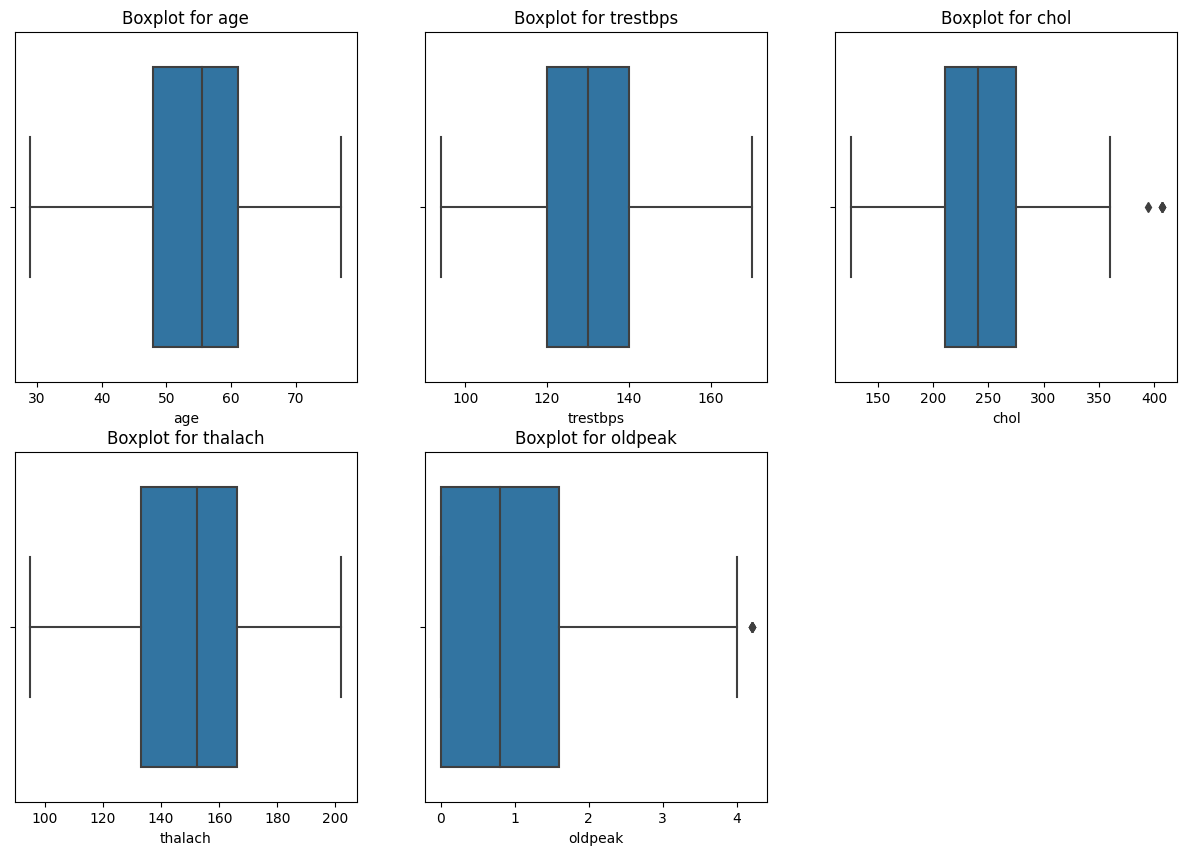

In [45]:
print(num_cols)
plt.figure(figsize=(15,10))
for i in range(len(num_cols)):  # range(5) => 0,1,2,3,4,5,6,7
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
    plt.ylabel('')
plt.show()

In [48]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1


In [49]:
df[num_cols].describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.258278,245.938675,149.688874,1.031126
std,9.04797,16.605232,49.143545,22.568343,1.119545
min,29.00000,94.000000,126.000000,95.010000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,170.000000,406.870000,202.000000,4.200000


#### Select x and y

In [56]:
x = df.drop('target',axis=1)
y = df['target']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(302, 13)
(302,)


In [57]:
x.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

#### Split the data into train and test

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(211, 13)
(91, 13)
(211,)
(91,)


#### Create function to evaluate the model

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    cr =  classification_report(ytest,ypred)
    print('Confusion_Matrix\n',cm)
    print('Classification Report\n',cr)
   
    
def model_score(model,x_train,x_test,y_train,y_test,mname):
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    res = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc},index=[mname])
    return res

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Standardization

z = (x - mean)/std

z = standardized value<br>

After Standardization<br>
1) Mean = 0, Std = 1<br>
2) Data is in similar range<br>

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [68]:
# x_train_sc = x_train.copy()
# x_test_sc = x_test.copy()

In [70]:
# x_train_sc[i] = sc.fit_transform(x_train[i])
# x_train_sc[i] = sc.transform(x_test[i])

#### Model Building

#### 1) LogReg

In [76]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
ypred_lr = lr.predict(x_test)
eval_model(y_test,ypred_lr)

Confusion_Matrix
 [[34  8]
 [ 7 42]]
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.84      0.86      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [75]:
lr_res = model_score(lr,x_train,x_test,y_train,y_test,'LogReg')
lr_res

,Train_Acc,Test_Acc
LogReg,0.867299,0.835165


#### Decision Tree

In [85]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_split=20,
                            min_samples_leaf=10)
dt.fit(x_train,y_train)
ypred_dt = dt.predict(x_test)
eval_model(y_test,ypred_dt)

Confusion_Matrix
 [[35  7]
 [10 39]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.83      0.80        42
           1       0.85      0.80      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [86]:
dt_res = model_score(dt,x_train,x_test,y_train,y_test,'Decision Tree')
dt_res  # Overfit (Train Score > Test Score)

,Train_Acc,Test_Acc
Decision Tree,0.867299,0.813187


#### Plot Decision Tree

In [87]:
from sklearn.tree import plot_tree

In [88]:
fn = x_train.columns
cn  = ['0','1']

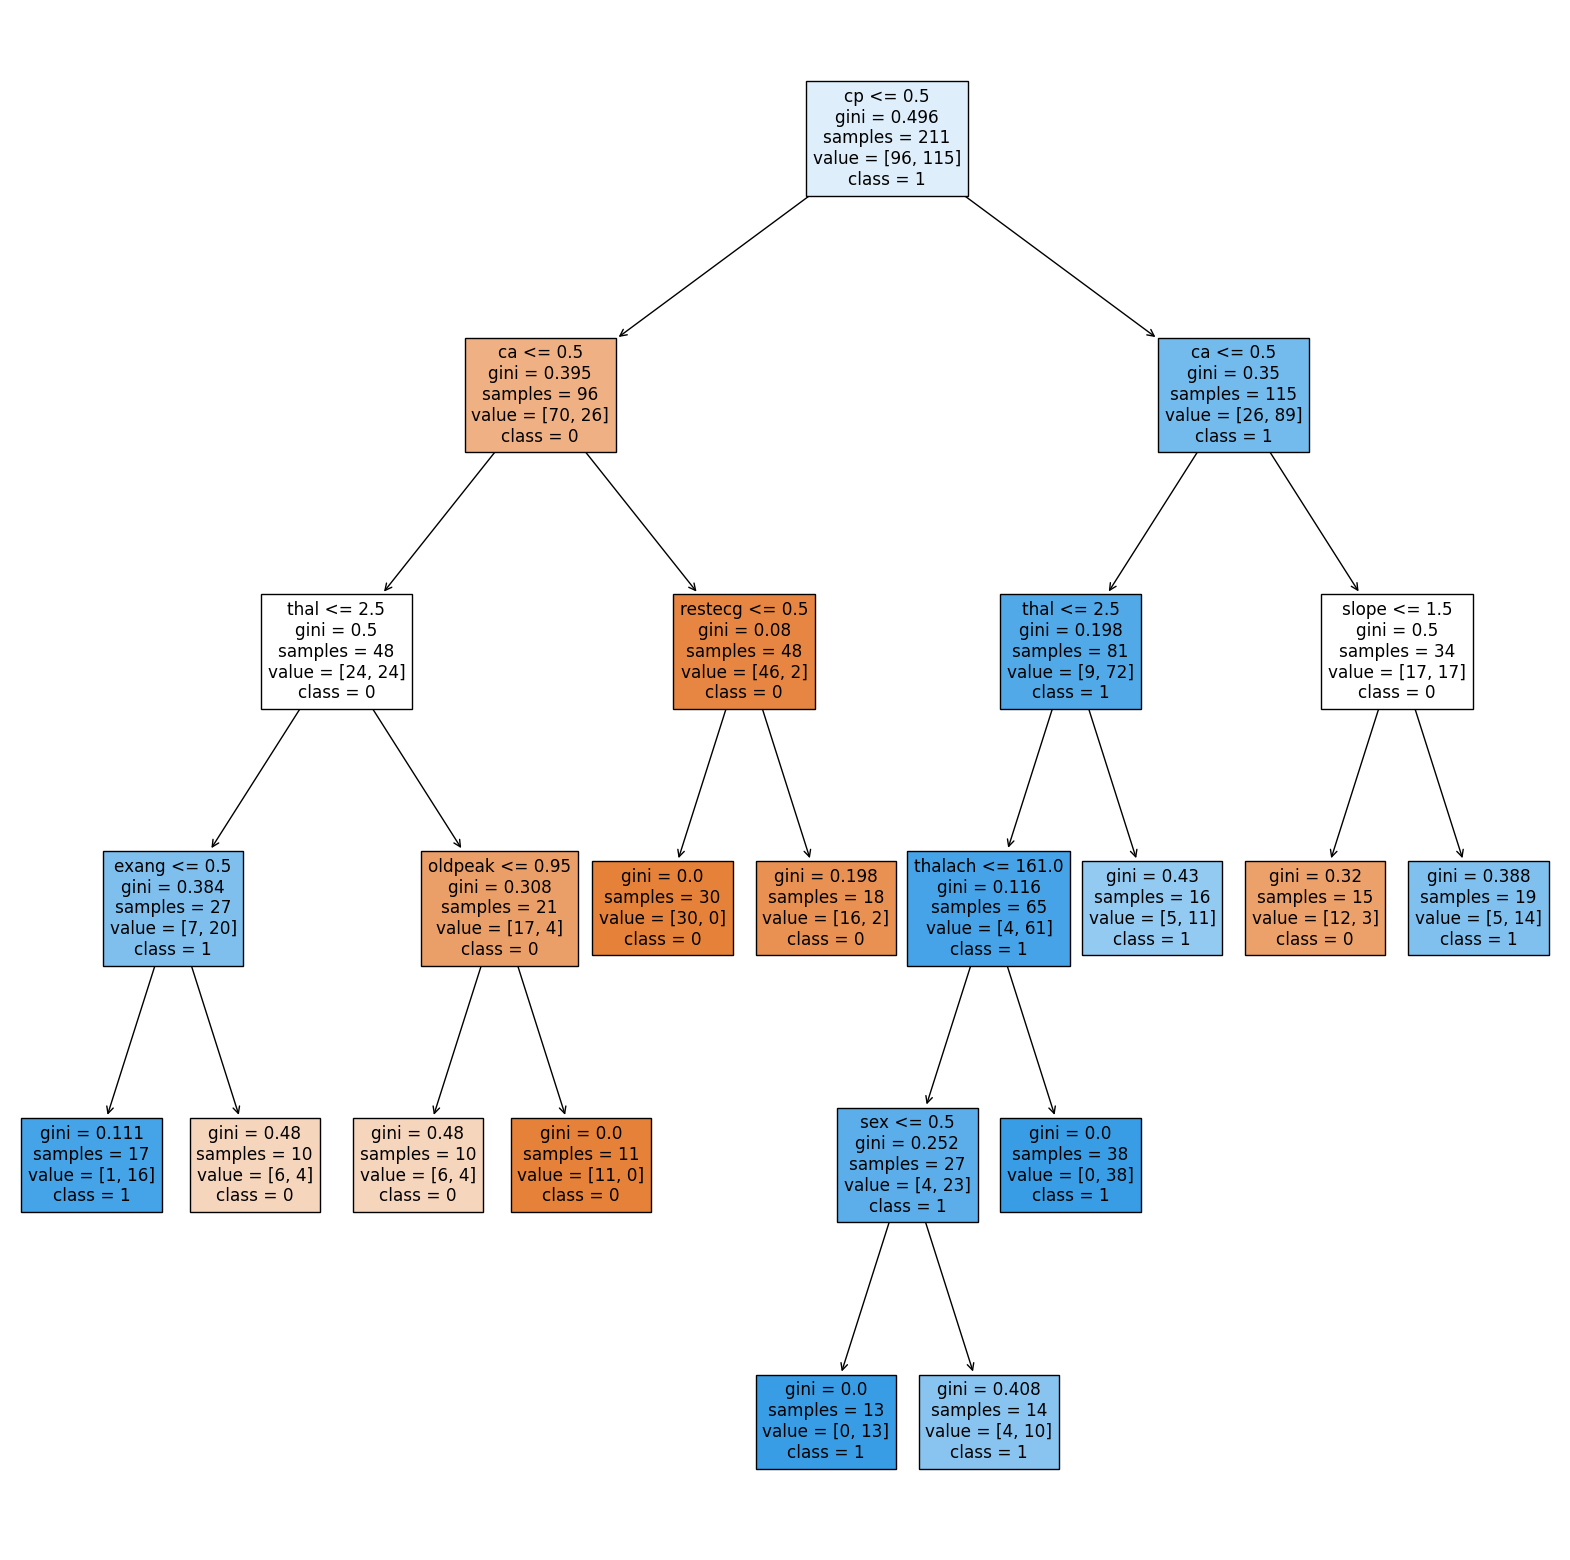

In [89]:
plt.figure(figsize=(20,20))
plot_tree(dt,class_names=cn,feature_names=fn,filled=True)
plt.show()

#### 3) KNN Classfier

In [94]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
ypred_knn = knn.predict(x_test)
eval_model(y_test,ypred_knn)

Confusion_Matrix
 [[25 17]
 [12 37]]
Classification Report
               precision    recall  f1-score   support

           0       0.68      0.60      0.63        42
           1       0.69      0.76      0.72        49

    accuracy                           0.68        91
   macro avg       0.68      0.68      0.68        91
weighted avg       0.68      0.68      0.68        91



In [95]:
knn_res = model_score(knn,x_train,x_test,y_train,y_test,'KNN Classifier')
knn_res  # Slightly Overfit (Train Score > Test Score)

,Train_Acc,Test_Acc
KNN Classifier,0.706161,0.681319


#### Random Forest

In [104]:
rf = RandomForestClassifier(n_estimators=75,criterion='gini',max_depth=11,min_samples_split=14)
rf.fit(x_train,y_train)
ypred_rf  = rf.predict(x_test)
eval_model(y_test,ypred_rf)

Confusion_Matrix
 [[36  6]
 [ 5 44]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.86      0.87        42
           1       0.88      0.90      0.89        49

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [105]:
rf_res = model_score(rf,x_train,x_test,y_train,y_test,'Random Forest')
rf_res  # Overfit (Train Score > Test Score)

,Train_Acc,Test_Acc
Random Forest,0.92891,0.879121


#### Tabulate Results

In [106]:
res = pd.concat([lr_res,dt_res,knn_res,rf_res])
res

,Train_Acc,Test_Acc
LogReg,0.867299,0.835165
Decision Tree,0.867299,0.813187
KNN Classifier,0.706161,0.681319
Random Forest,0.928910,0.879121
